As per theano's documentation, a shared variable is 'Variable with Storage that is shared between functions that it appears in'. We generally use the shared variables only when we need to update its value in an expression called by a function

In [1]:
import theano 
import numpy as np
import theano.tensor as T

In [2]:
x = theano.shared(0.0,'x_value')
print('The above example creates a theano shared variable named x with an initial value of 0.0 and name x_value(Declaration stage)')

The above example creates a theano shared variable named x with an initial value of 0.0 and name x_value(Declaration stage)


In [3]:
print('We create a function where the shared variable will be used.')
expression_to_compute  = T.arctan(x)

We create a function where the shared variable will be used.


In [4]:
print('Here we will perform an updation step. This means how the value of x will be changed at successive updates.')
x_update = x+1
print('We will just increment the value of x by 1')

Here we will perform an updation step. This means how the value of x will be changed at successive updates.
We will just increment the value of x by 1


In [5]:
function_to_compute = theano.function(inputs=[], outputs=expression_to_compute, updates=[(x, x_update)])
print('We wrote a function that has 3 parameters. The last parameter will consider the values to take and the values to update.')


We wrote a function that has 3 parameters. The last parameter will consider the values to take and the values to update.


In [6]:
print('We now compute the arctan function from x=0 till x=20 ')
yvalues = []
for i in range(0,21,1):
    yvalues.append(function_to_compute())
    
xvalues = list(range(0,21,1))

We now compute the arctan function from x=0 till x=20 


we will now see how the arctan function looks graphically 


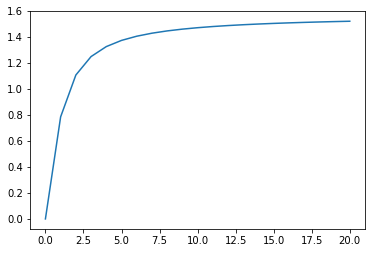

In [7]:
print('we will now see how the arctan function looks graphically ')
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xvalues,yvalues)
plt.show()

# Computation of minimum value of a function using gradient descent 

### Here we find the minima of a function with a learning rate of 0.1 and maximum steps =25


In [8]:
## step 1:- variable declaration
x = theano.shared(1.0,'xvalue')

#step 2:- Function to minimize
expression_to_eval = 1*x-T.arctan(x*2)+x**2+1

# Step 3:- Updation rule to be followed 
x_update = x-0.1*T.grad(expression_to_eval,x)

# Step 4:- Function to wrap the updation rule and evaluation of the expression formed at step2 and step 3 
evaluate = theano.function(inputs=[], outputs=expression_to_eval,updates=[(x,x_update)])

# Step 5:- Calling the theano function in a loop 
min_values = []
for i in range(1,21,1):
    min_values.append(evaluate())
x_range = list(range(1,21,1))

We can clearly see that the values tend to minimise and then be stable at  0.8477589275165133


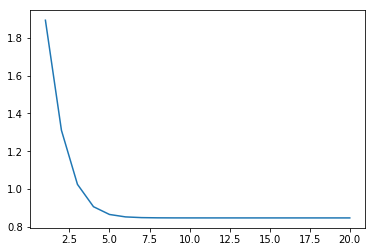

In [9]:
print('We can clearly see that the values tend to minimise and then be stable at ',min_values[-1])
plt.plot(x_range,min_values)
plt.show()